<a href="https://colab.research.google.com/github/Jayanth20/Data-Visualization/blob/main/Assignment_3_Jayanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Dino Fun World Analysis

### Assignment Description

The administrators of Dino Fun World, a local amusement park, have asked you, one of their data analysts, to perform three data analysis tasks for their park. These tasks will involve understanding, analyzing, and graphing attendance data for three days of the park's operations that the park has provided for you to use. They have provided the data in the form of a database.

Part 1: The park's administrators would like your help understanding the different paths visitors take through the park and different rides they visit. In this mission, they have selected five (5) visitors at random whose check-in sequences they would like you to analyze. For now, they would like you to construct a distance matrix for these five visitors. The five visitors have the IDs: 165316, 1835254, 296394, 404385, and 448990.

Part 2: The park's administrators would like to understand the attendance dynamics at each ride (note that not all attractions are rides). They would like to see the minimum (non-zero) attendance at each ride, the average attendance over the whole day, and the maximum attendance for each ride in a parallel coordinate plot.

Part 3: In addition to a parallel coordinate plot, the administrators would like to see a scatterplot matrix depicting the minimum, average, and maximum attendance for each ride as above.

**Hint:** Use “%matplotlib inline” to display the graph on the Jupyter Notebook(To allow the grader to identify the PartID, add the cell magic after the Graded Cell and PartID comments.).

### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > readonly/dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carussel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
Using the data provided, perform the required analyses and create the distance matrix, parallel coordinate plot, and scatterplot matrix.


### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

**NOTE:**  For each question, be sure to add your code in the exact cell that has the comment ```"# Graded Cell, PartID:______"```. If you add extra cells or split your code up into multiple cells, ensure you are adding your output print( ) statement and the chart in the cell containing the comment with regard to each question.


**NOTE:**  If you lose the partId that is mentioned in the first line of each cell with regard to each question, use the syntax described below to add it.
* Question 1: # Graded Cell, PartID : IiXwN 
* Question 2: # Graded Cell, PartID : 8S2jm
* Question 3: # Graded Cell, PartID : KHoww


### Question 1: 
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors. The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
from collections import Counter
from pandas.plotting import parallel_coordinates, scatter_matrix
from scipy.spatial import distance_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
db_path = '/content/gdrive/MyDrive/DV/dinofunworld-2.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [ ]:
# Graded Cell, PartID: IiXwN
# your code here

visitors = [165316, 1835254, 296394, 404385, 448990]
query = f"SELECT visitorid, sequence FROM sequences WHERE visitorid in ({','.join(str(v) for v in visitors)})"
cursor.execute(query)

visitor_sequence_dict = {visitorid: sequence for visitorid, sequence in cursor.fetchall()}
result = {visitor: {other_visitor: 0 for other_visitor in visitor_sequence_dict} for visitor in visitor_sequence_dict}

for visitor_a, seq_a in visitor_sequence_dict.items():
    for visitor_b, seq_b in visitor_sequence_dict.items():
        if visitor_a == visitor_b:
            continue
        
        parts_a = seq_a.split("-")
        parts_b = seq_b.split("-")
        distance = sum(part_a != part_b for part_a, part_b in zip(parts_a, parts_b))
        result[visitor_a][visitor_b] = distance

print(result)

{165316: {165316: 0, 296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 296394: 0, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 404385: 0, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 448990: 0, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282, 1835254: 0}}


### Question 2:  
Create and display a Parallel Coordinate Plot displaying the minimum, average, and maximum attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: { 1 : { name : 'Ride1', min : 1, max : 3, avg : 2 }, 2 :{ name : 'Ride2', min : 1, max : 3, avg : 2 } ... })

**Note:** Not all attractions are rides.

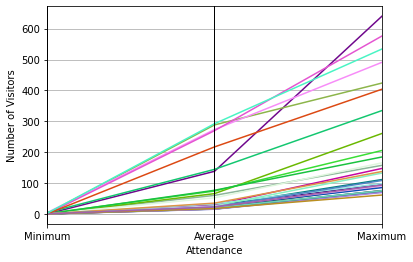

                         Ride Minimum     Average Maximum
0      Wrightiraptor Mountain       1   60.889780     158
1          Galactosaurus Rage       1   66.577551     261
2          Auvilotops Express       1  138.728745     640
3                  TerrorSaur       2  288.690909     424
4           Wendisaurus Chase       5  273.585366     491
5        Keimosaurus Big Spin       2   74.935354     206
6                    Firefall       1  270.036145     576
7                   Atmosfear       5  144.986056     335
8                  North Line       1   53.196721     166
9             Jeredactyl Jump       1   26.783262     112
10            Sauroma Bumpers       1   30.146930     148
11       Flying TyrAndrienkos       1   24.585313      98
12       Cyndisaurus Asteroid       1   16.873303      72
13                 Beelzebufo       1   18.239726      93
14       Enchanted Toadstools       1   16.357616      77
15                Stegocycles       1   17.145740      76
16            

In [ ]:
cursor.execute("SELECT attractionid, name FROM attraction WHERE LOWER(category) LIKE LOWER('%ride%')")
ride_data = {item[0]: {'name': item[1], 'counter': Counter()} for item in cursor.fetchall()}

cursor.execute("SELECT * FROM sequences")
for rec in cursor.fetchall():
    sequence = rec[2]
    for i, item in enumerate(sequence.split("-")):
        if int(item) in ride_data:
            ride_data[int(item)]['counter'][i] += 1

data = pd.DataFrame(columns=['Ride', 'Minimum', 'Average', 'Maximum'])
for ride_id, ride_stats in ride_data.items():
    minimum = min(ride_stats['counter'].values())
    maximum = max(ride_stats['counter'].values())
    average = (sum(ride_stats['counter'].values()) / len(ride_stats['counter'].values()))
    data.loc[len(data)] = [ride_stats['name'], minimum, average, maximum]

parallel_coordinates(data, class_column='Ride', cols=['Minimum', 'Average', 'Maximum'])
plt.gca().legend_.remove()

plt.xlabel("Attendance")
plt.ylabel("Number of Visitors")
plt.show()

print(data)


### Question 3:
Create and display a Scatterplot Matrix displaying the minimum, average, and maximum attendance for each ride in the park.

**Note:** This is a different view into the same data as the previous part. While you work on these plots, consider the different things that each chart says about the data.

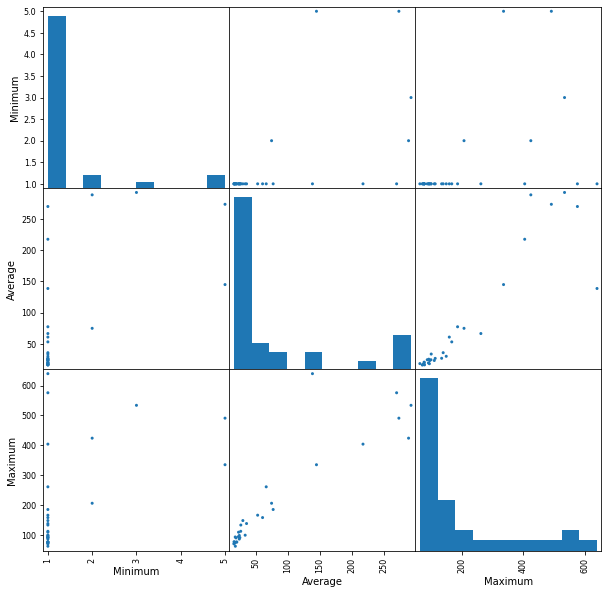

                         Ride  Minimum     Average  Maximum
0      Wrightiraptor Mountain        1   60.889780      158
1          Galactosaurus Rage        1   66.577551      261
2          Auvilotops Express        1  138.728745      640
3                  TerrorSaur        2  288.690909      424
4           Wendisaurus Chase        5  273.585366      491
5        Keimosaurus Big Spin        2   74.935354      206
6                    Firefall        1  270.036145      576
7                   Atmosfear        5  144.986056      335
8                  North Line        1   53.196721      166
9             Jeredactyl Jump        1   26.783262      112
10            Sauroma Bumpers        1   30.146930      148
11       Flying TyrAndrienkos        1   24.585313       98
12       Cyndisaurus Asteroid        1   16.873303       72
13                 Beelzebufo        1   18.239726       93
14       Enchanted Toadstools        1   16.357616       77
15                Stegocycles        1  

In [ ]:
# Select rides with category containing the word "ride"
cursor.execute("SELECT attractionid, name FROM attraction WHERE LOWER(category) LIKE LOWER('%ride%')")

# Initialize dictionaries to store ride data
ride_sequence_counts = {}
ride_name_dict = {}

# Store ride data in dictionaries
for item in cursor.fetchall():
    ride_sequence_counts[item[0]] = Counter()
    ride_name_dict[item[0]] = item[1]

# Get ride sequence counts
cursor.execute("SELECT * FROM sequences")
for rec in cursor.fetchall():
    sequence = rec[2]
    for i, ride_id in enumerate(sequence.split("-")):
        if int(ride_id) in ride_sequence_counts:
            ride_sequence_counts[int(ride_id)][i] += 1

# Compute ride statistics and store in a list
ride_stats_list = []
for ride_id in ride_sequence_counts:
    ride_name = ride_name_dict[ride_id]
    ride_counts = ride_sequence_counts[ride_id].values()
    ride_stats_list.append([ride_name, min(ride_counts), (sum(ride_counts)/len(ride_counts)), max(ride_counts)])

# Create a pandas DataFrame from ride statistics list
ride_stats_data = pd.DataFrame(ride_stats_list, columns=['Ride', 'Minimum', 'Average', 'Maximum'])

# Plot scatter matrix of ride statistics
scatter_matrix(ride_stats_data, figsize=(10, 10), alpha=1)
plt.show()

print(ride_stats_data)